### **Please submit the different parts of Module 3 in separate notebooks.**

**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 3 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*:

*Email*:

*I plan to take the next available Module 3 Assessment*: Yes/No

# Module 3, Part 1

Please complete this assignment in a Colab.  

Please submit all parts of the Module 3 assignment as separate notebooks in the Canvas assignment for Module 3 ("Module 3 Assignment").

# Section 0: Initialization 

In [32]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from google.colab import drive

In [2]:
# mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 3/Sample_Data_m3.csv")
df.head(5)

,Unnamed: 0,a,b,target
0,0,664159,550946,1
1,1,665845,557965,1
2,2,597173,575538,1
3,3,618600,551446,1
4,4,635690,608046,1


In [4]:
df.max()

Unnamed: 0      4999
a             961951
b             970756
target            15
dtype: int64

# Section 1: Visualization & Pre-Processing

### 1\. Plot scatter plot with data from column 'a' on the x-axis, the data from column 'b' as the y-axis, and the data from the 'target' column as the color parameter (parameter 'c')

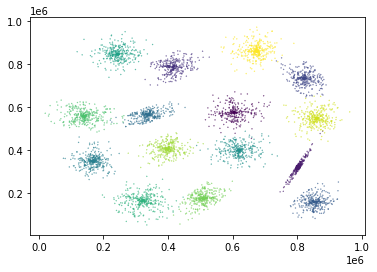

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['a'], df['b'], c = df['target'], s = 0.1)

### 2\. Split dataset into training and test set & reset the indices of each 

*   List item
*   List item

output dataframe

Notes:
* Reset the index columns for each of the four dataframes output by the train_test_split below (x_train, x_test, y_train, y_test) so that it contains consecutive numbers starting at 0.

* Use a small test set while you are still experimenting since the classification step is time consuming.  You can use a larger one, e.g., 25% once you are ready to plot the confusion matrix at the end of the assignment.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df[["a","b"]], df["target"], test_size = 0.25 , random_state = 100)
x_train.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)
x_test.reset_index(inplace = True,drop=True)
y_test.reset_index(inplace = True, drop=True)



### 3\.  Add a "target" column to x_train and store the y_train values there

In [24]:
x_train.insert(2,"target", y_train)

# Section 3: KNN Algorithm Implementation

### 1\. Implement a function euclidean_dist(p1,p2) that returns the euclidean distance between two numpy arrays, p1 and p2. 

In [26]:
import math
def euclidean_dist(p1, p2):
  # calculating Euclidean distance
  # using linalg.norm()
  # return np.linalg.norm(p1 - p2)
  return math.sqrt((p1[0]-p2[0])**2 +(p1[1]-p2[1])**2)
  # print(dist)

### 2\. Implement a function get_closest_neighbors(training_data, test_object, k) which returns the k nearest neighbors to the test object (nearest neighbors from  the training data 

* The function accepts as arguments a numpy matrix (training_data), a test object (a numpy array), and the parameter k.

* The function returns k vectors (the k nearest neighbor to the test object)

* The distance computation is performed using the euclidean_dist() function you wrote in the exercise above.

* The distance computation needs to use the "a" and "b" column values for both a training object and the test object when computing the distance between them (print out the contents of the different variables to make sure you are using the right data) 


In [27]:
def get_closest_neighbors(training_data, test_object, k):
  distances = []
  k_closest_neighbors = []
  for train_row in training_data:
	  dist = euclidean_dist(test_object, train_row)
	  distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  
  for i in range(k):
	  k_closest_neighbors.append(distances[i][0])
  return k_closest_neighbors


In [16]:
np.random.randint(970756, size=2)

array([174605, 145579])

### 3\. Implement a classification function

Given a set of neighbors, compute what class do the majority of them belong to, using a voting strategy (e.g., each neighbor votes for the class that it belongs to)

Notes:

* You may find the following functions helpful: np.bincount, np.argmax


In [28]:
def knn_classify(neighbors):
  output_values = [row[-1] for row in neighbors]
  majority_vote = max(set(output_values), key=output_values.count)
  return majority_vote

**Use your KNN classifer to classify the test samples in your dataset**
(you do not need to add code here)

In [29]:
y_test_pred = []
k = 10

# print("length of x_train", len(x_train))
# print("length of x_test", len(x_test))
for i in tqdm(range(len(x_test))):
# for i in tqdm(range(5)):
  # find k closest neighbors
  # k_neighbors = get_closest_neighbors(x_train.to_numpy(), x_test.iloc[i,:2], k)
  k_neighbors = get_closest_neighbors(x_train.to_numpy(), x_test.iloc[i,:2], k)
  # compute the class for the test object
  test_object_class = knn_classify(k_neighbors)
  # add the prediction to the list of predictions y_test_pred 
  y_test_pred.append(test_object_class)

100%|██████████| 1250/1250 [00:44<00:00, 27.97it/s]


### 4\. Compute the confusion matrix for the above predictions

In [30]:
cm = (confusion_matrix(y_test, y_test_pred))


### 5\. Use the ConfusionMatrixDisplay.from_predictions function to plot a confusion matrix heatmap

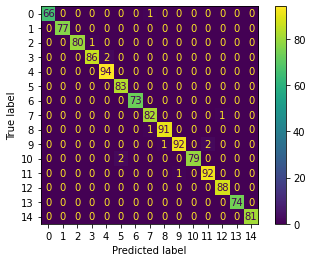

In [33]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()